# Objective
## Hyperparameter tuning for SVM, XGBoost, KNN and RFC

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

### Get the data from the saved dataset

In [3]:
df_orig = pd.read_csv('out.zip', compression='zip')

In [4]:
df_orig.shape

(140651, 44)

In [5]:
df_orig= df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]

In [6]:
df_orig.user.unique()

array(['germany-c', 'beck-s', 'kaminski-v', 'kean-s', 'symes-k',
       'dasovich-j', 'mann-k', 'farmer-d', 'jones-t', 'shackleton-s'],
      dtype=object)

In [7]:
df_orig['user']=df_orig['user'].map( {'germany-c': 1,'beck-s': 2,'kaminski-v': 3,'kean-s': 4,'symes-k': 5, 'dasovich-j': 6,'mann-k': 7,
                            'farmer-d': 8, 'jones-t': 9,  'shackleton-s': 10} ).astype(int)


In [8]:
df_t = df_orig.groupby('user').sum()
df_t

,nr_sentences,avg_number_of_words_per_sent,std_deviation_len,nr_chars,nr_alphabet,nr_upper,nr_lower,nr_numerics,nr_spaces,nr_punctuation,...,most_frequency,nr_pos,nr_function,avg_length_np,nr_positive_word,nr_neg_word,nr_neutral_word,nr_named_entity,score_semantic,nr_greeting
user,,,,,,,,,,,,,,,,,,,,,
1,112887.0,62446.600388,54651.408442,3735619,3255745,339671,2916074,219756,1124621,255730,...,45353.0,123658.0,279652.0,89130.718145,25228.0,9386.0,673655.0,172396.0,3089.3414,168.0
2,132817.0,80890.593242,85952.398042,6333860,5896095,411990,5484105,146251,1521478,284492,...,67530.0,141640.0,507894.0,102985.478866,56304.0,10953.0,1159499.0,253988.0,6375.7312,433.0
3,400661.0,96343.376660,148979.163981,13005216,11521617,1067971,10453646,514171,3027954,959614,...,121294.0,263969.0,850058.0,203739.211873,110102.0,24971.0,2061477.0,557920.0,11597.7758,1988.0
4,274767.0,107010.598770,108214.157961,16540004,15301313,960268,14341045,425631,3596361,800108,...,172239.0,169395.0,1126125.0,151102.420642,120606.0,55559.0,2822669.0,665177.0,5761.3975,256.0
5,127625.0,54117.904346,69750.043685,5022194,4496828,465552,4031276,218289,1189417,295827,...,49832.0,122920.0,357048.0,86791.994613,44161.0,13005.0,849009.0,219484.0,4309.6957,282.0
6,535300.0,111184.063427,141987.170186,28474460,25788426,1795419,23993007,791986,5839218,1856993,...,260238.0,236079.0,1783962.0,176830.188223,187671.0,87024.0,4577819.0,1218198.0,8888.3908,728.0
7,199658.0,119940.996895,143984.271300,8044251,7317197,530235,6786962,240765,1911677,479174,...,98662.0,254561.0,654517.0,177848.578804,74520.0,16424.0,1405950.0,285374.0,9276.3032,1851.0
8,126645.0,62575.107525,78572.863057,4416515,3842491,402549,3439942,263085,1154741,302033,...,51986.0,141648.0,321075.0,114060.132727,35257.0,8199.0,790533.0,228479.0,4501.1840,206.0
9,125579.0,91439.328233,93508.984610,5438231,4885377,552601,4332776,201347,1208427,330697,...,59890.0,155210.0,377495.0,129133.973344,47805.0,8955.0,895921.0,248875.0,5957.7373,194.0


In [9]:
maxPerson = 10

In [10]:
df1=df_orig.groupby('user').size()
df1

user
1     10163
2     10434
3     20719
4     13851
5      9455
6     18087
7     20622
8     11768
9     12222
10    13330
dtype: int64

In [11]:
df= df_orig.groupby('user',as_index=False)

In [12]:
df=df.apply(lambda df: df.sample(9000))

In [13]:
df.shape

(90000, 41)

In [14]:
for user in range(1,maxPerson+1):
    random = df.loc[df['user'] == user]
    print(random.shape)

(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)
(9000, 41)


In [15]:
X=df[[ 'nr_sentences','avg_number_of_words_per_sent', 'std_deviation_len', 'nr_chars',
       'nr_alphabet', 'nr_upper', 'nr_lower', 'nr_numerics', 'nr_spaces',
       'nr_punctuation', 'nr_commas', 'nr_dots', 'nr_exclamation', 'nr_qmark',
       'nr_colons', 'nr_semicolons', 'nr_hyphens', 'num_paras', 'av_sent',
       'av_words', 'nr_words', 'avg_characters_per_word', 'nr_longwords',
       'nr_stopwords', 'nr_error', 'TTR', 'HTR', 'most_frequency', 'nr_pos',
       'nr_function', 'avg_length_np', 'nr_positive_word', 'nr_neg_word',
       'nr_neutral_word', 'nr_named_entity', 'score_semantic', 'nr_greeting']]
Y=df[['user']]

In [16]:
X=StandardScaler().fit_transform(X)

In [17]:
X.shape

(90000, 37)

In [18]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2)

### K Means Clustering

In [76]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(u_train_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

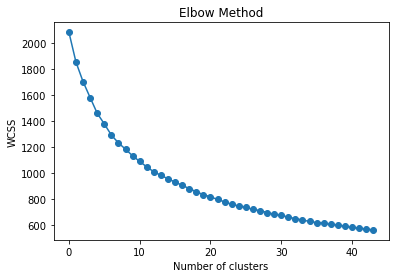

In [46]:
plt.plot(range(len(wcss)), wcss, marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### KNearest Neighbors

In [69]:
clf = KNeighborsClassifier(n_neighbors = 150,weights ='distance', algorithm="kd_tree")
clf.fit(train_X, train_Y.values.ravel())
Y_pred = clf.predict(test_X)
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           1       0.35      0.44      0.39      1005
           2       0.30      0.37      0.33       959
           3       0.37      0.45      0.41      1025
           4       0.34      0.33      0.34      1024
           5       0.38      0.43      0.40      1008
           6       0.32      0.15      0.21       981
           7       0.28      0.29      0.29       957
           8       0.38      0.34      0.36       982
           9       0.35      0.22      0.27      1045
          10       0.30      0.36      0.32      1014

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.33     10000
weighted avg       0.34      0.34      0.33     10000



In [239]:
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           1       0.41      0.36      0.38      2600
           2       0.42      0.27      0.33      2600
           3       0.30      0.31      0.30      2600
           4       0.27      0.53      0.36      2600
           5       0.31      0.15      0.21      2600

    accuracy                           0.32     13000
   macro avg       0.34      0.32      0.32     13000
weighted avg       0.34      0.32      0.32     13000



### PC Analysis

In [52]:
pca = PCA(.95)
components=pca.fit(train_X)
pca.n_components_ 

5

In [53]:
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [87]:
### Accuracy for KNN
# 100 accuracy: 0.4874 (+/- 0.0147)
# 110 accuracy: 0.4870 (+/- 0.0148)
# 120 accuracy: 0.4872 (+/- 0.0147)
# 130 accuracy: 0.4855 (+/- 0.0126)
# 140 accuracy: 0.4862 (+/- 0.0120)
# 150 accuracy: 0.4855 (+/- 0.0138)
# 160 accuracy: 0.4851 (+/- 0.0153)
# 170 accuracy: 0.4839 (+/- 0.0118)
# 180 accuracy: 0.4829 (+/- 0.0131)
# 190 accuracy: 0.4836 (+/- 0.0130)

In [32]:
knn = KNeighborsClassifier(n_neighbors = 150,weights ='distance')
knn.fit(train_X, np.asarray(train_Y.values.ravel()))
Y_pred = knn.predict(test_X)
accuracy = accuracy_score(test_Y, Y_pred)
accuracy

0.5506

In [344]:
clf = KNeighborsClassifier(n_neighbors = 150,weights ='distance', algorithm="ball_tree")
scoring = "accuracy"
scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
# knn_results[i] = scores
print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

accuracy: 0.5032 (+/- 0.0089)


### Cross-validation accuracy for KNN 

In [74]:
from sklearn.model_selection import cross_val_score

knn_results = {}
for i in range(100, 200, 10):
    print(i, end = " ")
    clf = KNeighborsClassifier(n_neighbors = i,weights ='distance', algorithm="ball_tree")
    scoring = "accuracy"
    scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
    knn_results[i] = scores
    print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

100 accuracy: 0.4874 (+/- 0.0147)
110 accuracy: 0.4870 (+/- 0.0148)
120 accuracy: 0.4872 (+/- 0.0147)
130 accuracy: 0.4855 (+/- 0.0126)
140 accuracy: 0.4862 (+/- 0.0120)
150 accuracy: 0.4855 (+/- 0.0138)
160 accuracy: 0.4851 (+/- 0.0153)
170 accuracy: 0.4839 (+/- 0.0118)
180 accuracy: 0.4829 (+/- 0.0131)
190 accuracy: 0.4836 (+/- 0.0130)


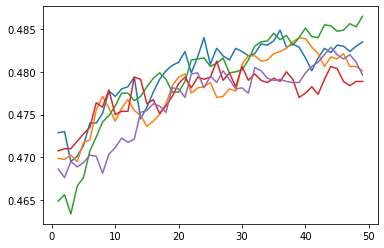

In [219]:
plt.plot(list(knn_results.keys()), list(knn_results.values()))

In [24]:
# for i in range(1,60):
#     knn = KNeighborsClassifier(n_neighbors = i,weights ='distance')
#     knn.fit(train_X, np.asarray(train_Y))
#     Y_pred = knn.predict(test_X)
#     accuracy = accuracy_score(test_Y, Y_pred)
#     print ("Neighbour:", i, " Accuracy:",accuracy)

### SVM Classifier

In [2]:
import pandas as pd 
0.2182,0.2330,0.2476,0.2220,0.2408,0.2653,0.2238,0.2458,0.2818

0.2653, 0.2996, 0.3259, 0.2935, 0.3321, 0.3623

(0.2182, 0.233, 0.2476, 0.222, 0.2408, 0.2653, 0.2238, 0.2458, 0.2818)

In [22]:
svm_hyper = {'Degree': [1,1,1,2,2,2,3,3,3],
        'Coef0': [2,3,4,2,3,4,2,3,4],
        'Accuracy': [0.2182,0.2330,0.2476,0.2220,0.2408,0.2653,0.2238,0.2458,0.2818]
        }

df = pd.DataFrame(cars, columns = ['Degree', 'Coef0', 'Accuracy'])

In [25]:
df.style.set_caption("Hello World")
df

,Degree,Coef0,Accuracy
0,1,2,0.2182
1,1,3,0.2330
2,1,4,0.2476
3,2,2,0.2220
4,2,3,0.2408
5,2,4,0.2653
6,3,2,0.2238
7,3,3,0.2458
8,3,4,0.2818


In [ ]:
# cc: 1, dd: 2 accuracy: 0.2182
# cc: 1, dd: 3 accuracy: 0.2330
# cc: 1, dd: 4 accuracy: 0.2476
# cc: 2, dd: 2 accuracy: 0.2220
# cc: 2, dd: 3 accuracy: 0.2408
# cc: 2, dd: 4 accuracy: 0.2653
# cc: 3, dd: 2 accuracy: 0.2238
# cc: 3, dd: 3 accuracy: 0.2458
# cc: 3, dd: 4 accuracy: 0.2818


# cc: 2, dd: 4 accuracy: 0.2653
# cc: 2, dd: 5 accuracy: 0.2996
# cc: 2, dd: 6 accuracy: 0.3259
# cc: 4, dd: 4 accuracy: 0.2935
# cc: 4, dd: 5 accuracy: 0.3321
# cc: 4, dd: 6 accuracy: 0.3623
# cc: 8, dd: 4 accuracy: 0.3202

### Parameter tuning for SVC using cross-validation accuracy score

In [ ]:
from sklearn.svm import SVC

svm_results = []
for cc in [2,4,8]:
    for dd in [4,5,6]:
        clf = SVC(kernel='poly', degree = dd, coef0 = cc)
        # svclassifier.fit(train_X, train_Y.values.ravel())
        scoring = "accuracy"
        scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
        # svm_results[i] = scores
        print("cc: " + str(cc) + ", dd: " + str(dd), end = " ")
        print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))


cc: 2, dd: 4 accuracy: 0.2653 (+/- 0.0072)
cc: 2, dd: 5 accuracy: 0.2996 (+/- 0.0077)
cc: 2, dd: 6 accuracy: 0.3259 (+/- 0.0072)
cc: 4, dd: 4 accuracy: 0.2935 (+/- 0.0062)
cc: 4, dd: 5 accuracy: 0.3321 (+/- 0.0096)
cc: 4, dd: 6 accuracy: 0.3623 (+/- 0.0088)
cc: 8, dd: 4 accuracy: 0.3202 (+/- 0.0091)


In [102]:
from datetime import datetime
clf = SVC(kernel='poly', degree = 3, coef0 = 2)
# clf = SVC(kernel='rbf', C=0.05)
# scoring = "accuracy"
start = datetime.now()
clf.fit(train_X, train_Y.values.ravel())
# scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
end = datetime.now()
print("time taken: " + str((end-start).total_seconds()))
# svm_results[i] = scores

time taken: 705.726092


In [ ]:
pred_Y = clf.predict(test_X)
# print("cc: " + str(cc) + ", dd: " + str(dd), end = " ")
# print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
# accuracy = accuracy_score(test_Y, pred_Y)
# accuracy

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
report = precision_recall_fscore_support(test_Y, pred_Y)

In [110]:
dir(report)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [ ]:
rf_results = []
for n in range(200,300,10):
    clf = RandomForestClassifier(n_estimators = n)
    scoring = "accuracy"
    scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
    # svm_results[i] = scores
    print("n_estimators: " + str(n), end = " ")
    print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))


In [34]:

clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(train_X, train_Y.values.ravel())
# scoring = "accuracy"
# scores = cross_val_score(clf, train_X, train_Y.values.ravel(), cv=5, scoring=scoring)
# svm_results[i] = scores
# print("n_estimators: " + str(n), end = " ")
# print(scoring + ": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
pred_Y = clf.predict(test_X)
# accuracy = accuracy_score(test_Y, pred_Y)
# accuracy
print(accuracy_score(test_Y, pred_Y))

0.5907


In [109]:

print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           1       0.44      0.28      0.34      1800
           2       0.39      0.22      0.28      1800
           3       0.31      0.62      0.42      1800
           4       0.27      0.38      0.31      1800
           5       0.79      0.18      0.30      1800
           6       0.23      0.48      0.31      1800
           7       0.50      0.23      0.32      1800
           8       0.65      0.24      0.35      1800
           9       0.27      0.29      0.28      1800
          10       0.32      0.37      0.34      1800

    accuracy                           0.33     18000
   macro avg       0.42      0.33      0.32     18000
weighted avg       0.42      0.33      0.32     18000



### Hyperparameter tuning for Random forest Classifier using cross-validation accuracy

In [154]:
for i in range(1,1024):    
    classifier = RandomForestClassifier(n_estimators = i)
    classifier.fit(train_X, train_Y.values.ravel())
    Y_pred = classifier.predict(test_X)
    accuracy = accuracy_score(test_Y, Y_pred)
    print ("Estimators:", i, " Accuracy:",accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 1  Accuracy: 0.1757
Estimators: 2  Accuracy: 0.1964


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 3  Accuracy: 0.2056


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 4  Accuracy: 0.2319


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 5  Accuracy: 0.2553


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 6  Accuracy: 0.2527


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 7  Accuracy: 0.2614


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 8  Accuracy: 0.2562


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 9  Accuracy: 0.2822


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 10  Accuracy: 0.2809


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 11  Accuracy: 0.2999


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 12  Accuracy: 0.2977


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 13  Accuracy: 0.293


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 14  Accuracy: 0.3027


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 15  Accuracy: 0.3053


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 16  Accuracy: 0.3145


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 17  Accuracy: 0.3227


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 18  Accuracy: 0.3216


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 19  Accuracy: 0.3273


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 20  Accuracy: 0.324


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 21  Accuracy: 0.3307


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 22  Accuracy: 0.3365


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 23  Accuracy: 0.3326


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 24  Accuracy: 0.332


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 25  Accuracy: 0.3458


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 26  Accuracy: 0.343


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 27  Accuracy: 0.3463


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 28  Accuracy: 0.3562


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 29  Accuracy: 0.3322


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 30  Accuracy: 0.3371


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 31  Accuracy: 0.349


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 32  Accuracy: 0.3505


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 33  Accuracy: 0.3271


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 34  Accuracy: 0.3641


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 35  Accuracy: 0.3392


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 36  Accuracy: 0.3419


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 37  Accuracy: 0.3504


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 38  Accuracy: 0.3446


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 39  Accuracy: 0.3536


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 40  Accuracy: 0.3495


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 41  Accuracy: 0.358


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 42  Accuracy: 0.3469


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 43  Accuracy: 0.3729


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 44  Accuracy: 0.3543


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 45  Accuracy: 0.3608


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 46  Accuracy: 0.3667


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 47  Accuracy: 0.361


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 48  Accuracy: 0.3564


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 49  Accuracy: 0.3632


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 50  Accuracy: 0.3624


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 51  Accuracy: 0.364


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 52  Accuracy: 0.3608


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 53  Accuracy: 0.3684


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 54  Accuracy: 0.3639


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 55  Accuracy: 0.3827


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 56  Accuracy: 0.3709


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 57  Accuracy: 0.3786


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 58  Accuracy: 0.375


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Estimators: 59  Accuracy: 0.3658


In [111]:
from datetime import datetime
from xgboost import XGBClassifier


In [ ]:
for m in opts_max_depth:
    for l in opts_learning_rate:
        for s in opts_subsample:
            for c in opts_colsample_bytree:
                print("m=%d, l=%.4f, s=%.4f, c=%.4f"%(m, l, s, c))

### Tuning the XGBoost classifier using cross-validation accuracy

In [88]:
opts_max_depth = [4,8,12]
opts_learning_rate = [0.08, 0.04, 0.02]
opts_subsample = [0.8, 0.9]
opts_colsample_bytree = [0.4, 0.6, 0.8]

all_opts = [opts_max_depth, opts_learning_rate, opts_subsample, opts_colsample_bytree]

for m in opts_max_depth:
    for l in opts_learning_rate:
        for s in opts_subsample:
            for c in opts_colsample_bytree:                
                model = XGBClassifier(silent=False, 
                                      scale_pos_weight=1,
                                      learning_rate=l,  
                                      colsample_bytree = c,
                                      subsample = s,
                                      objective='multi:softmax', 
                                      n_estimators=1000, 
                                      reg_alpha = 0.3,
                                      max_depth=m, 
                                      gamma=5) 
                start = datetime.now()
                model.fit(train_X, train_Y.values.ravel())
                end = datetime.now()

                print("Time for learing: " + str((end-start).total_seconds()))
                Y_pred = model.predict(test_X)
                accuracy = accuracy_score(test_Y, Y_pred)
                accuracy

Time for learing: 213.563326
Time for learing: 242.426791
Time for learing: 271.806112
Time for learing: 202.928551
Time for learing: 235.59677
Time for learing: 265.96839
Time for learing: 207.953058
Time for learing: 235.376749
Time for learing: 269.334969
Time for learing: 204.378152
Time for learing: 233.666932
Time for learing: 266.791338
Time for learing: 205.388587
Time for learing: 241.409791
Time for learing: 274.276366
Time for learing: 206.24535
Time for learing: 236.746751
Time for learing: 269.19151
Time for learing: 337.715409
Time for learing: 414.096121
Time for learing: 474.760702
Time for learing: 333.933879
Time for learing: 409.826598
Time for learing: 470.781634
Time for learing: 379.505466
Time for learing: 463.490311
Time for learing: 553.373319
Time for learing: 377.867609
Time for learing: 462.9511
Time for learing: 531.041728
Time for learing: 396.948226
Time for learing: 487.969205
Time for learing: 521.229954
Time for learing: 347.043521
Time for learing: 42

In [112]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.04,  
                      colsample_bytree = 0.4,
                      subsample = 0.9,
                      objective='multi:softmax', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=8, 
                      gamma=5) 
start = datetime.now()
model.fit(train_X, train_Y.values.ravel())
end = datetime.now()

print("Time for learing: " + str((end-start).total_seconds()))
Y_pred = model.predict(test_X)
print(classification_report(test_Y, pred_Y))

Time for learing: 678.142163
              precision    recall  f1-score   support

           1       0.37      0.41      0.39      1820
           2       0.31      0.41      0.35      1732
           3       0.43      0.46      0.44      1816
           4       0.29      0.35      0.32      1790
           5       0.43      0.38      0.40      1797
           6       0.36      0.27      0.31      1782
           7       0.31      0.42      0.36      1810
           8       0.46      0.28      0.35      1843
           9       0.33      0.28      0.30      1778
          10       0.44      0.36      0.40      1832

    accuracy                           0.36     18000
   macro avg       0.37      0.36      0.36     18000
weighted avg       0.37      0.36      0.36     18000



In [157]:
!pip install xgboost

     |████████████████████████████████| 109.7 MB 6.2 kB/s  eta 0:00:01
